In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("../data/Spotify Dataset/genres_v2.csv")
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [4]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [5]:
df = df.drop(columns=['Unnamed: 0', "title"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [7]:
missing_values = df.isnull().sum()

# Display missing values count
print(missing_values)

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
dtype: int64


In [8]:
df = df.dropna()

In [9]:
missing_values = df.isnull().sum()

# Display missing values count
print(missing_values)

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
genre               0
song_name           0
dtype: int64


In [10]:
len(df)

21519

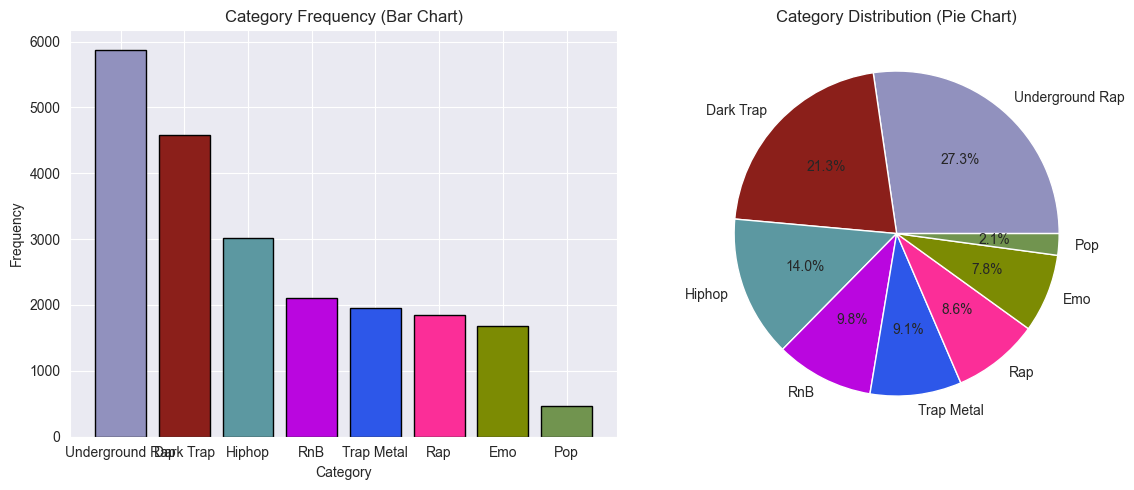

In [11]:
# check count of each genre
category_counts = df["genre"].value_counts()

# Generate random colors for each bar and pie slice
colors = np.random.rand(len(category_counts), 3)  # RGB colors

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
axes[0].bar(category_counts.index, category_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Category Frequency (Bar Chart)')

# Pie chart
axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors)
axes[1].set_title('Category Distribution (Pie Chart)')

# Show the plots
plt.tight_layout()
plt.show()

## Perfoming Principal Component Analysis

In [12]:
from sklearn.preprocessing import StandardScaler
num_cols = [i for i in df.columns if df[i].dtype != 'object']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

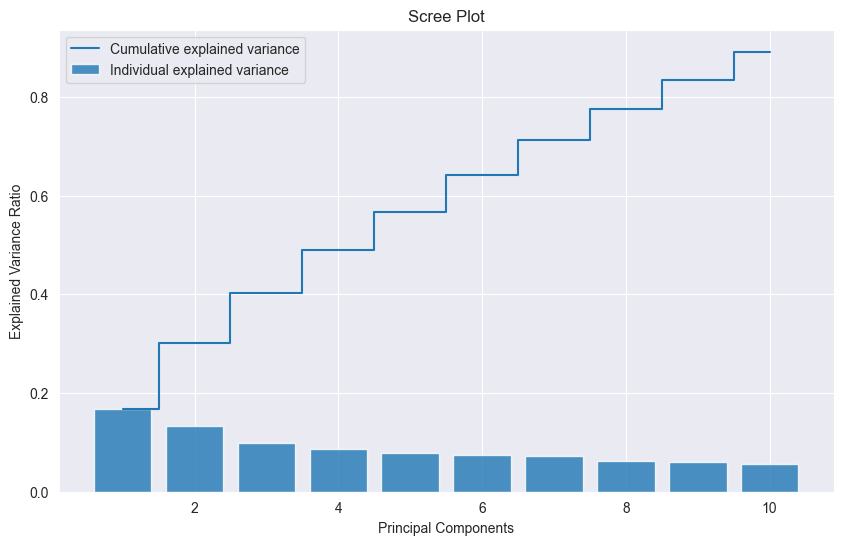

In [13]:
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components = n_components)
pca_result = pca.fit_transform(df[num_cols])

# Scree plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.8, align='center', label='Individual explained variance')
plt.step(range(1, n_components + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.show()

We see that 70% of the variance is explained with the first 7 components

In [14]:
n_components = 7  # Adjust the number of components as needed
pca = PCA(n_components=n_components)
pca_df = pca.fit_transform(df[num_cols])
pca_df

array([[ 0.72744793,  1.49528309,  1.45551131, ..., -0.18057591,
        -0.29146626,  1.02676961],
       [-1.56932148, -0.15488319,  0.21727034, ...,  0.22093679,
        -0.00370397, -1.18457925],
       [ 1.43184518, -0.38880973,  1.34405046, ..., -0.91255619,
        -0.24095772,  2.05423925],
       ...,
       [ 0.5962441 ,  0.74150937, -0.31569595, ...,  1.3100812 ,
         0.15704045,  0.73807337],
       [ 1.17979961,  0.79984214, -0.88034358, ...,  0.80250373,
        -0.36518845,  0.73789536],
       [ 1.37517168,  0.51945625, -1.09542731, ...,  1.39395825,
        -0.36004554,  0.64665566]])

# Performing K means

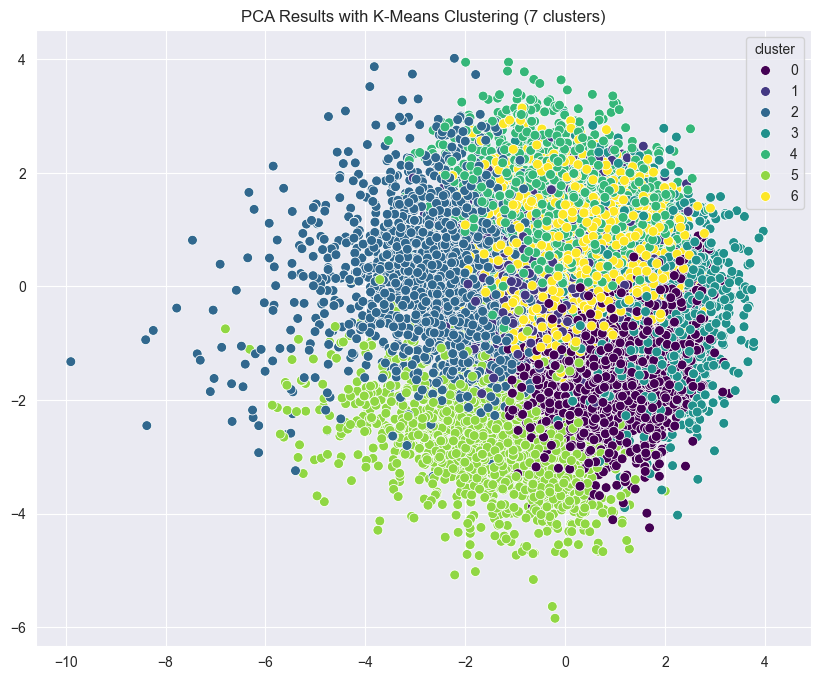

In [15]:
# 1. Define the number of clusters
n_clusters = 7

# 2. Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans_model.fit_predict(pca_result)

# 3. Assign the cluster labels to a copy of df (to keep original df unchanged)
df_with_clusters = df.copy()
df_with_clusters['cluster'] = cluster_labels

# 4. Plot the first two principal components, coloring by cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=df_with_clusters['cluster'],
    palette='viridis',
    s=50
)
plt.title(f'PCA Results with K-Means Clustering ({n_clusters} clusters)')
plt.show()

In [16]:
df_with_clusters['cluster'].value_counts()

cluster
6    4667
1    3854
4    3496
0    3413
2    2391
3    2065
5    1633
Name: count, dtype: int64

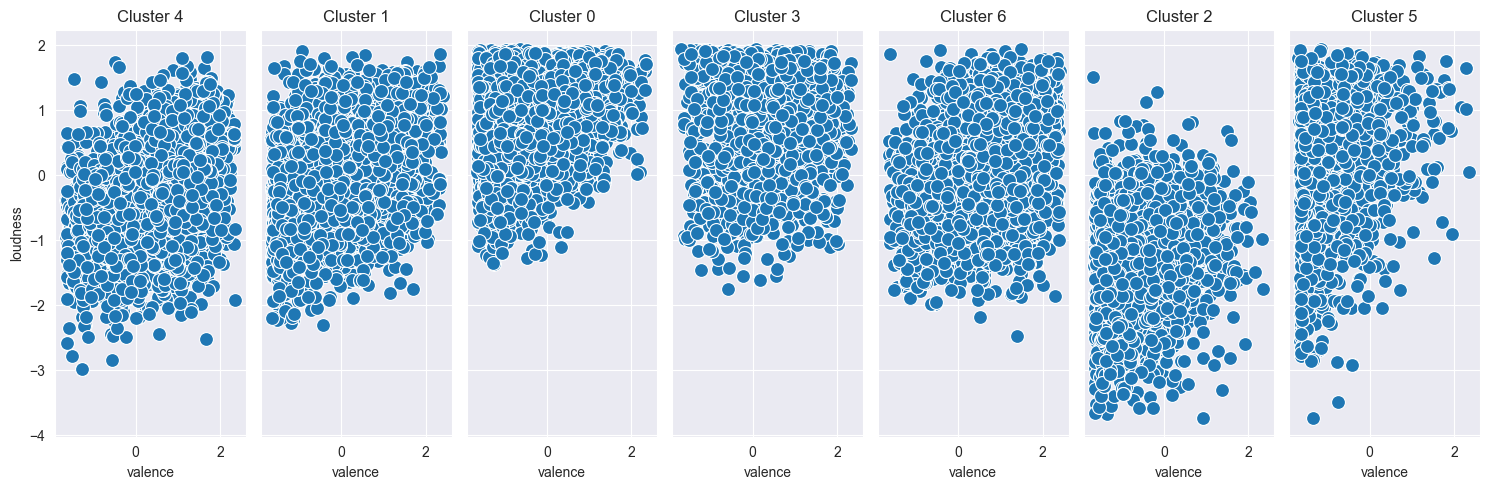

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column named 'cluster' in your DataFrame
clusters = df_with_clusters['cluster'].unique()

# Creating subplots for each cluster
fig, axes = plt.subplots(nrows=1, ncols=len(clusters), figsize=(15, 5), sharex=True, sharey=True)

# Plotting for each cluster
for i, cluster in enumerate(clusters):
    cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster]
    ax = axes[i]
    sns.scatterplot(x='valence', y='energy', data=cluster_data, palette='viridis', s=100, ax=ax)
    ax.set_title(f'Cluster {cluster}')
    ax.set_xlabel('valence')
    ax.set_ylabel('loudness')
    ax.legend().set_visible(False)  # Hide legend for each subplot

plt.tight_layout()
plt.show()

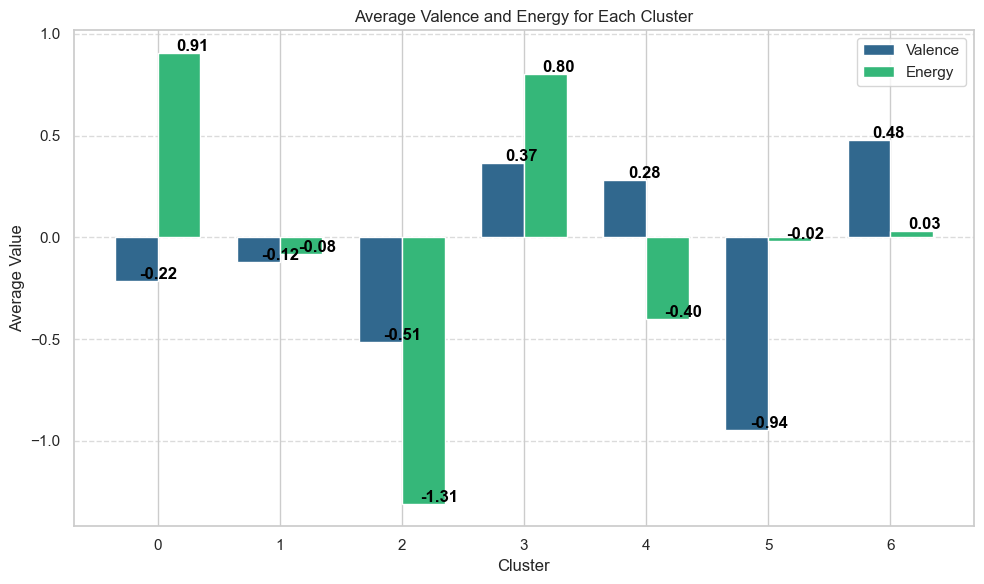

In [18]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Group by 'clusters' and calculate the mean for 'valence' and 'energy'
cluster_means = df_with_clusters.groupby('cluster')[['valence', 'energy']].mean().reset_index()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', 2)

# Plotting the average 'valence' and 'energy' for each cluster in grouped bars
bar_width = 0.35
index = cluster_means['cluster']

plt.figure(figsize=(10, 6))

plt.bar(index - bar_width/2, cluster_means['valence'], bar_width, color=colors[0], label='Valence')
plt.bar(index + bar_width/2, cluster_means['energy'], bar_width, color=colors[1], label='Energy')

# Displaying values on top of each bar
for i, valence, energy in zip(index, cluster_means['valence'], cluster_means['energy']):
    plt.text(i - 0.15, valence + 0.01, f'{valence:.2f}', color='black', fontweight='bold')
    plt.text(i + 0.15, energy + 0.01, f'{energy:.2f}', color='black', fontweight='bold')

plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.title('Average Valence and Energy for Each Cluster')
plt.xticks(index, cluster_means['cluster'])
plt.legend()

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [19]:
df_with_clusters['cluster'].value_counts()

cluster
6    4667
1    3854
4    3496
0    3413
2    2391
3    2065
5    1633
Name: count, dtype: int64

In [20]:
#Label each cluster with specific mood

# Suppose df_with_clusters already has a 'cluster' column.
mood_map = {
    0: 'Angry',
    1: 'Neutral',
    2: 'Sad',
    3: 'Happy',
    4: 'Fear',
    5: 'Disgust',
    6: 'Surprise'
}

# Map each cluster number to the corresponding mood
df_with_clusters['mood'] = df_with_clusters['cluster'].map(mood_map)

df_with_clusters

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,cluster,mood
0,0.981142,0.892058,-0.851506,-0.111620,0.845700,1.720137,-0.515637,-0.283449,-0.922819,-0.121456,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/audio-analysis/2Vc6NJ9PW9gD9q343XFRKx,-1.159134,0.096616,Dark Trap,Mercury: Retrograde,4,Fear
1,0.278612,-0.934762,0.773019,-0.065516,0.845700,-0.701566,1.121242,-0.344165,-0.510852,-1.255378,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/audio-analysis/7pgJBLVz5VmnL7uGHmRj6p,0.495325,0.096616,Dark Trap,Pathology,1,Neutral
2,1.100322,1.341649,-0.039244,0.776386,0.845700,-0.823149,-0.736319,-0.344146,1.166063,-1.618661,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/audio-analysis/0vSWgAlfpye0WCGeNmuNhy,-1.585104,0.096616,Dark Trap,Symbiote,0,Angry
3,-1.245628,0.704254,-1.393015,0.801502,0.845700,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/audio-analysis/0VSXnJqQkwuH2ei1nOQ1nu,-1.173676,-2.974397,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0,Angry
4,0.774147,-0.189237,-0.851506,-0.216212,0.845700,0.817153,0.238517,-0.344165,-0.193955,0.742892,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/audio-analysis/4jCeguq9rMTlbMmPHuO7S3,-1.179689,0.096616,Dark Trap,Venom,4,Fear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,-0.856727,0.920513,-1.122260,0.089309,0.845700,2.054312,-0.761553,-0.344165,-0.425026,-0.707672,...,4YuGxSdxyL6fRD7uchn9dI,spotify:track:4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/tracks/4YuGxSdxyL6fRD7uchn9dI,https://api.spotify.com/v1/audio-analysis/4YuGxSdxyL6fRD7uchn9dI,0.249445,0.096616,Hiphop,Daddy's Girl,4,Fear
21521,-1.628256,-0.621756,0.502265,-0.524142,0.845700,0.760272,0.272099,-0.344165,-0.484444,0.473318,...,034dSXepspHaYFW7rZZx1d,spotify:track:034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/tracks/034dSXepspHaYFW7rZZx1d,https://api.spotify.com/v1/audio-analysis/034dSXepspHaYFW7rZZx1d,0.320932,0.096616,Hiphop,'94,4,Fear
21522,0.692603,-0.052653,0.502265,0.045614,0.845700,0.717611,-0.727204,-0.335193,-0.629689,0.379181,...,7oCZpPJcPDZfeIy2t6gqSg,spotify:track:7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/tracks/7oCZpPJcPDZfeIy2t6gqSg,https://api.spotify.com/v1/audio-analysis/7oCZpPJcPDZfeIy2t6gqSg,1.281080,0.096616,Hiphop,Born 2 Live,4,Fear
21523,0.454245,0.994497,-0.580752,0.448158,-1.182453,0.049261,0.315275,-0.344102,-0.431628,1.350503,...,2kpwzDrLK5KoIk1S5wftX7,spotify:track:2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/tracks/2kpwzDrLK5KoIk1S5wftX7,https://api.spotify.com/v1/audio-analysis/2kpwzDrLK5KoIk1S5wftX7,-0.206737,0.096616,Hiphop,Can't Hold On,6,Surprise


## Eploring the new dataset formed

Text(0, 0.5, 'Count of songs')

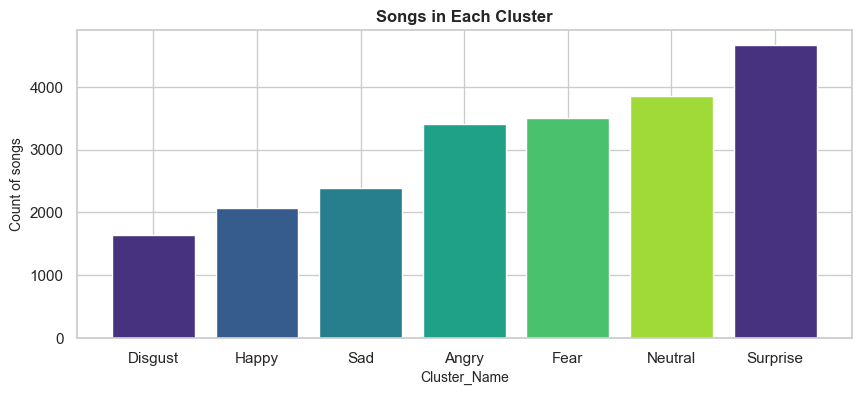

In [21]:
# Get value counts of each unique value in 'cluster' column
cluster_counts = df_with_clusters['mood'].value_counts().sort_values()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis')

# Plotting a bar graph for the counts of each unique value in 'cluster' column
plt.figure(figsize=(10, 4))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color=colors)

plt.title('Songs in Each Cluster', fontsize=12, fontweight='bold')
plt.xlabel('Cluster_Name', fontsize=10)
plt.ylabel('Count of songs', fontsize=10)

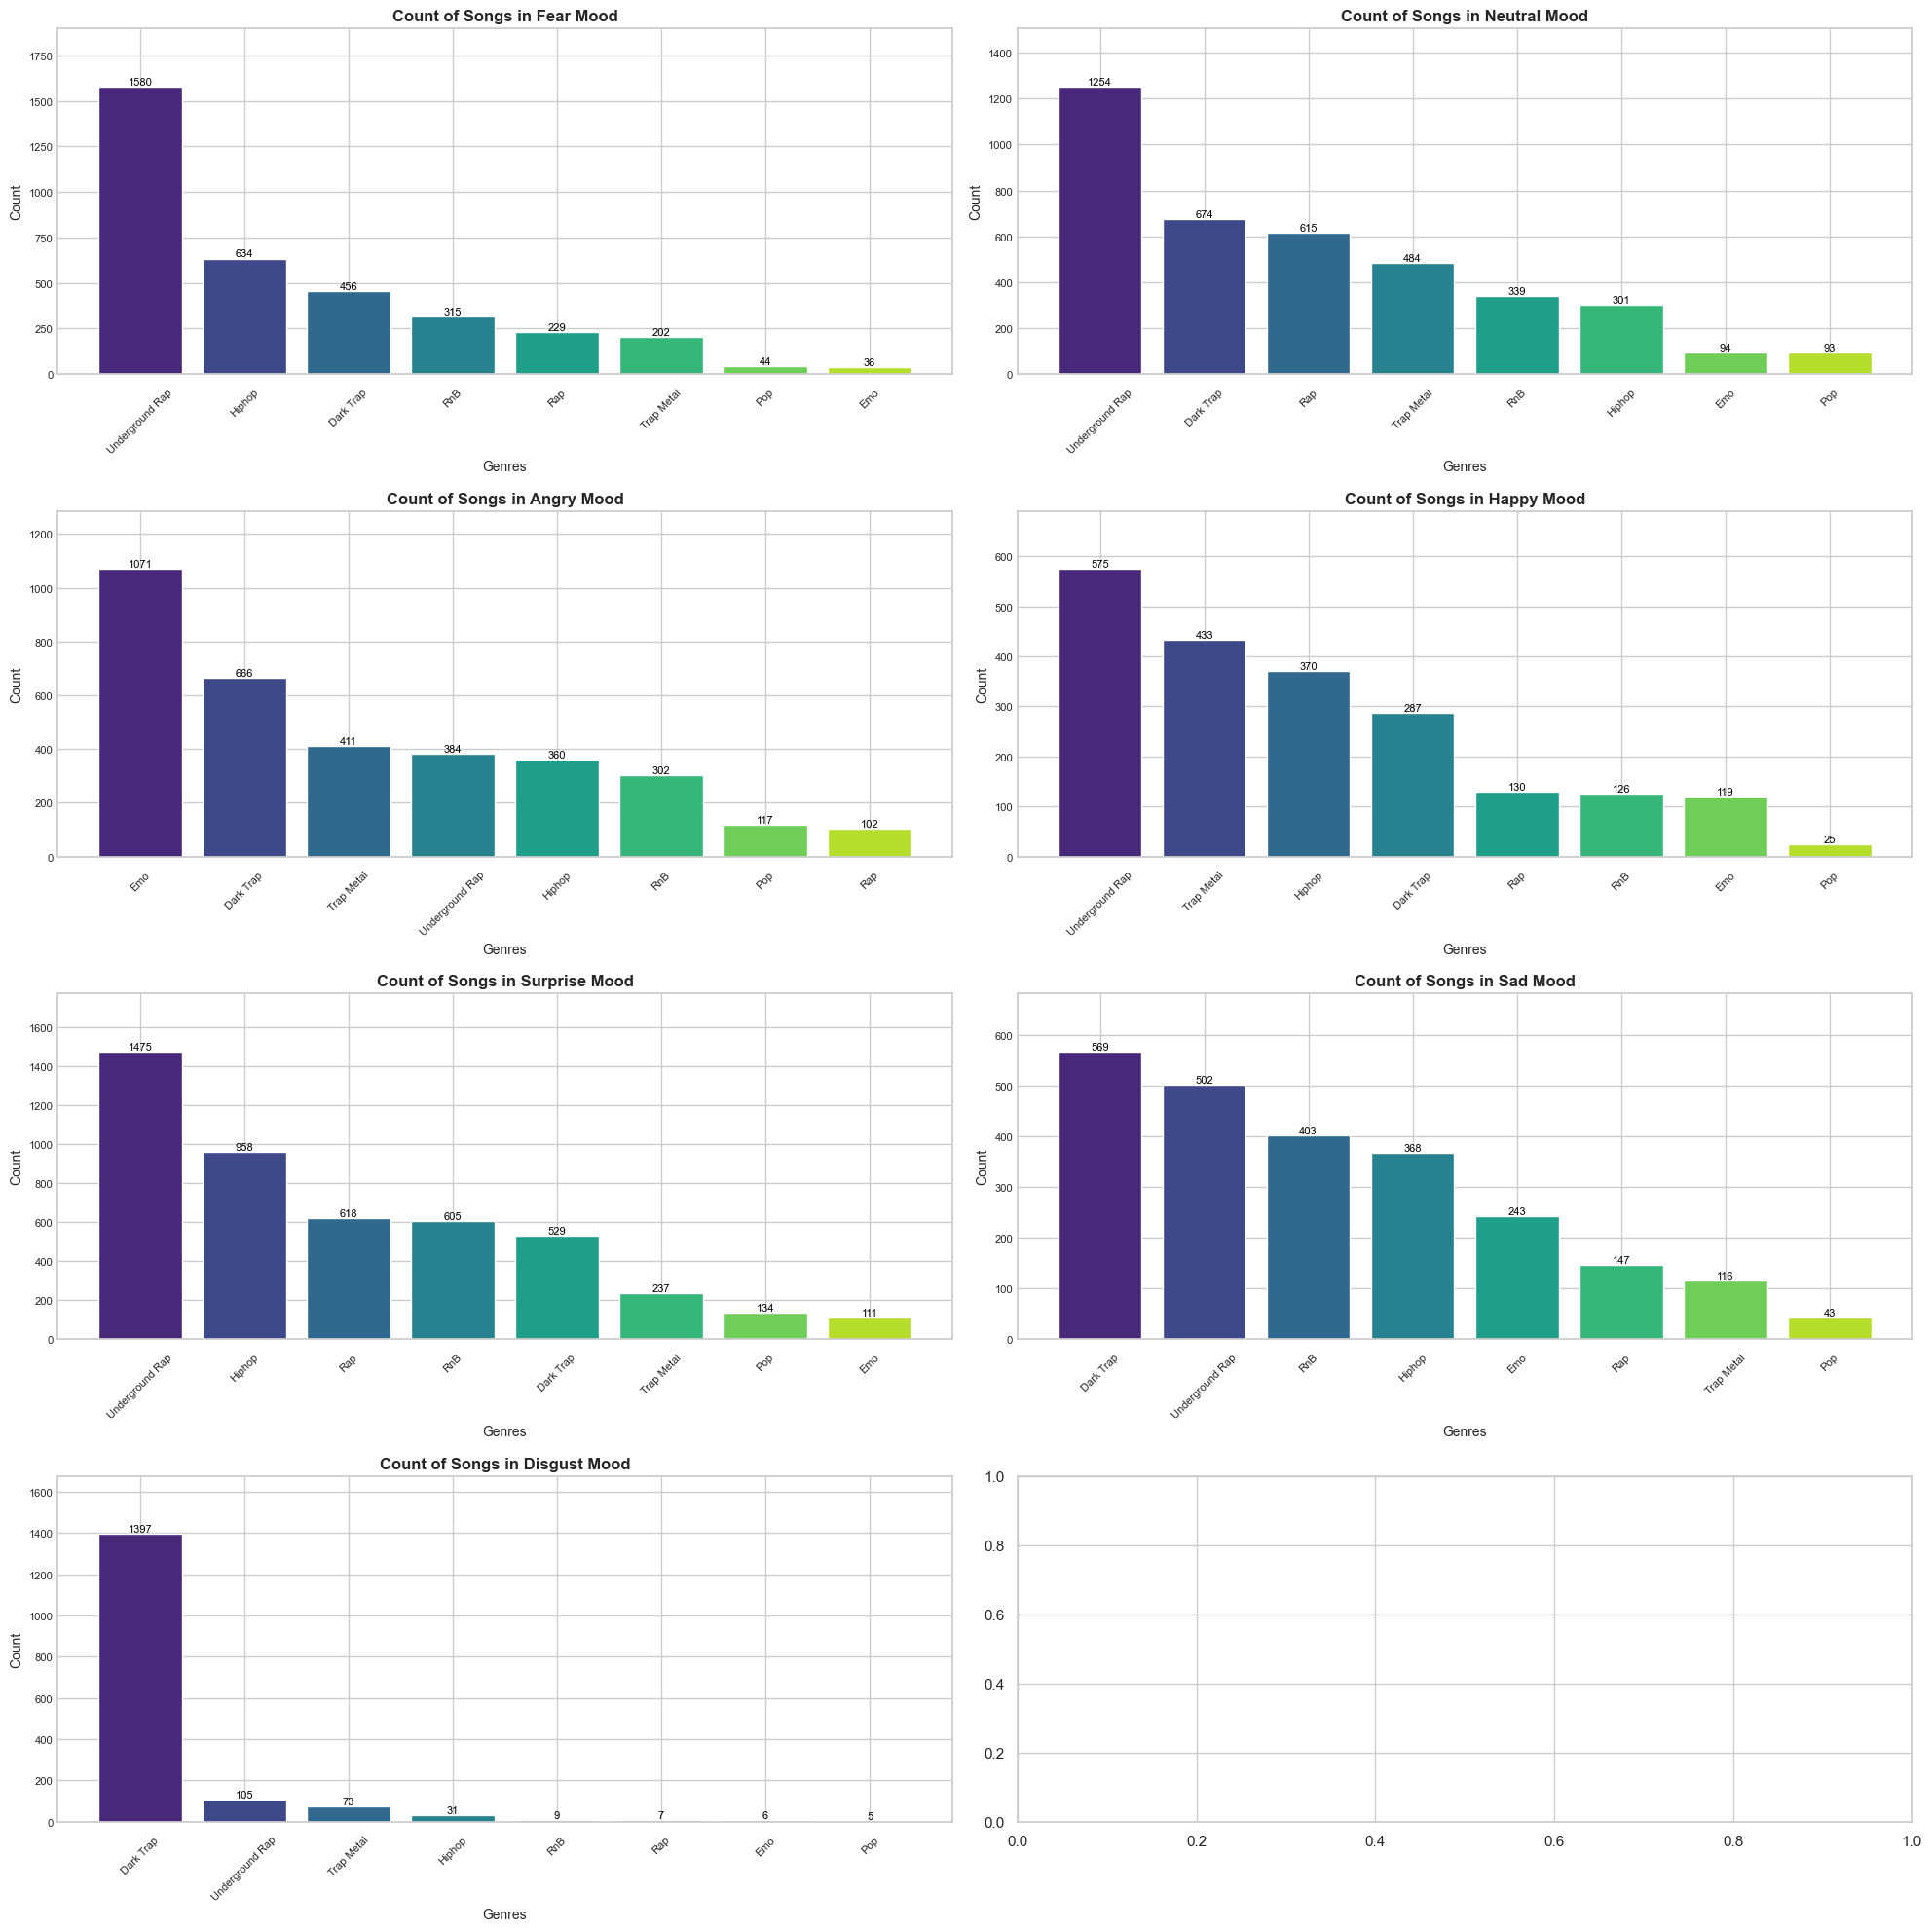

In [22]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Get unique moods and genres
unique_moods = df_with_clusters['mood'].unique()
unique_genres = df_with_clusters['genre'].unique()

# Set the same color palette as used in the count plot
colors = sns.color_palette('viridis', len(unique_genres))

# Create subplots for each mood
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

for i, mood in enumerate(unique_moods):
    row = i // 2
    col = i % 2

    mood_data = df_with_clusters[df_with_clusters['mood'] == mood]
    genre_counts = mood_data['genre'].value_counts()

    # Plotting bar graph for the counts of each unique value in 'genre' column
    bars = axes[row, col].bar(genre_counts.index, genre_counts.values, color=colors)

    axes[row, col].set_title(f'Count of Songs in {mood} Mood', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Genres', fontsize=10)
    axes[row, col].set_ylabel('Count', fontsize=10)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=8)
    axes[row, col].tick_params(axis='y', labelsize=8)
    axes[row, col].tick_params(axis='y', which='both', length=0)
    axes[row, col].set_ylim(0, genre_counts.max() * 1.2)

    # Display count values above each bar
    for bar in bars:
        yval = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8, color='black')

# Adjust layout
plt.tight_layout()
plt.show()

## Recommending songs based on detected mood

In [23]:
# let detected mood be disgust
detected_mood = "Sad"
filtered_df = df_with_clusters[df_with_clusters['mood'] == detected_mood]
random_songs = filtered_df.sample(5)['song_name']
print("detected mood: ", detected_mood)
print("random songs: ", random_songs)


detected mood:  Sad
random songs:  7248                 Tripwire
16432    Breathing Underwater
983                Bad Habits
20433             Skinny Suge
21158               Hey Lover
Name: song_name, dtype: object


In [24]:
df_with_clusters.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,cluster,mood
0,0.981142,0.892058,-0.851506,-0.111620,0.8457,1.720137,-0.515637,-0.283449,-0.922819,-0.121456,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/audio-analysis/2Vc6NJ9PW9gD9q343XFRKx,-1.159134,0.096616,Dark Trap,Mercury: Retrograde,4,Fear
1,0.278612,-0.934762,0.773019,-0.065516,0.8457,-0.701566,1.121242,-0.344165,-0.510852,-1.255378,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/audio-analysis/7pgJBLVz5VmnL7uGHmRj6p,0.495325,0.096616,Dark Trap,Pathology,1,Neutral
2,1.100322,1.341649,-0.039244,0.776386,0.8457,-0.823149,-0.736319,-0.344146,1.166063,-1.618661,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/audio-analysis/0vSWgAlfpye0WCGeNmuNhy,-1.585104,0.096616,Dark Trap,Symbiote,0,Angry
3,-1.245628,0.704254,-1.393015,0.801502,0.8457,-0.533767,-0.688824,-0.344165,-0.537261,-1.037152,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/audio-analysis/0VSXnJqQkwuH2ei1nOQ1nu,-1.173676,-2.974397,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),0,Angry
4,0.774147,-0.189237,-0.851506,-0.216212,0.8457,0.817153,0.238517,-0.344165,-0.193955,0.742892,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/audio-analysis/4jCeguq9rMTlbMmPHuO7S3,-1.179689,0.096616,Dark Trap,Venom,4,Fear


In [25]:
df_with_clusters.to_csv("../data/df_with_clusters.csv", index=False)